In [1]:
using DynamicalSystems,  DifferentialEquations, OrdinaryDiffEq

In [2]:
using StaticArrays

In [3]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [16]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1=  -0.4; k2 = -0.4; 
k = 0.0
condition1 = SA[-1.0, 0.0, 0.0, -2.5, 0.0, 0.0]
p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]
ds = ContinuousDynamicalSystem(HR,  condition1, p )
ds

condition2 = SA[0.1, 0.0, 0.0, 0.1, 0.0, 0.0]
p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]
ds1 = ContinuousDynamicalSystem(HR,  condition2, p )
ds1

6-dimensional continuous dynamical system
 state:       [0.1, 0.0, 0.0, 0.1, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.4, -0.4, 0.0]

In [19]:
tr = trajectory(ds, 150000, diffeq = (alg = Vern9(),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ));



#xsum = tr[:, 1] + tr[:, 4]
# xsum = xsum[floor(Int, length(xsum) / 2):end ];

x1 = tr[:, 1]
y1 = tr[:, 2]
z1 = tr[:, 3];
x1 = x1[floor(Int, length(x1) / 2):end ];
y1 = y1[floor(Int, length(y1) / 2):end ];
z1 = z1[floor(Int, length(z1) / 2):end ];

x2 = tr[:, 4]
y2 = tr[:, 5]
z2 = tr[:, 6];
x2 = x2[floor(Int, length(x2) / 2):end ];
y2 = y2[floor(Int, length(y2) / 2):end ];
z2 = z2[floor(Int, length(z2) / 2):end ];

#xsum = tr[:, 1] + tr[:, 4]
#xsum = xsum[floor(Int, length(xsum) / 2):end ];

tr1 = trajectory(ds1, 250000, diffeq = (alg = Vern9(),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ));

x11 = tr1[:, 1]
y11 = tr1[:, 2]
z11 = tr1[:, 3];
x11 = x11[floor(Int, length(x11) / 2):end ];
y11 = y11[floor(Int, length(y11) / 2):end ];
z11= z11[floor(Int, length(z11) / 2):end ];

x21 = tr1[:, 4]
y21 = tr1[:, 5]
z21 = tr1[:, 6];
x21 = x21[floor(Int, length(x21) / 2):end ];
y21 = y21[floor(Int, length(y21) / 2):end ];
z21 = z21[floor(Int, length(z21) / 2):end ];


Hs(x, k) = Statistics.mean(x) + k * Statistics.std(x)
threshold = Hs((x1 + x2), 6)

2.390076389123206

In [5]:
#xr = -10..10
#yr = -10..10
#zr = -10..10

#box = xr × yr × zr × xr × yr × zr
using CairoMakie

using Statistics

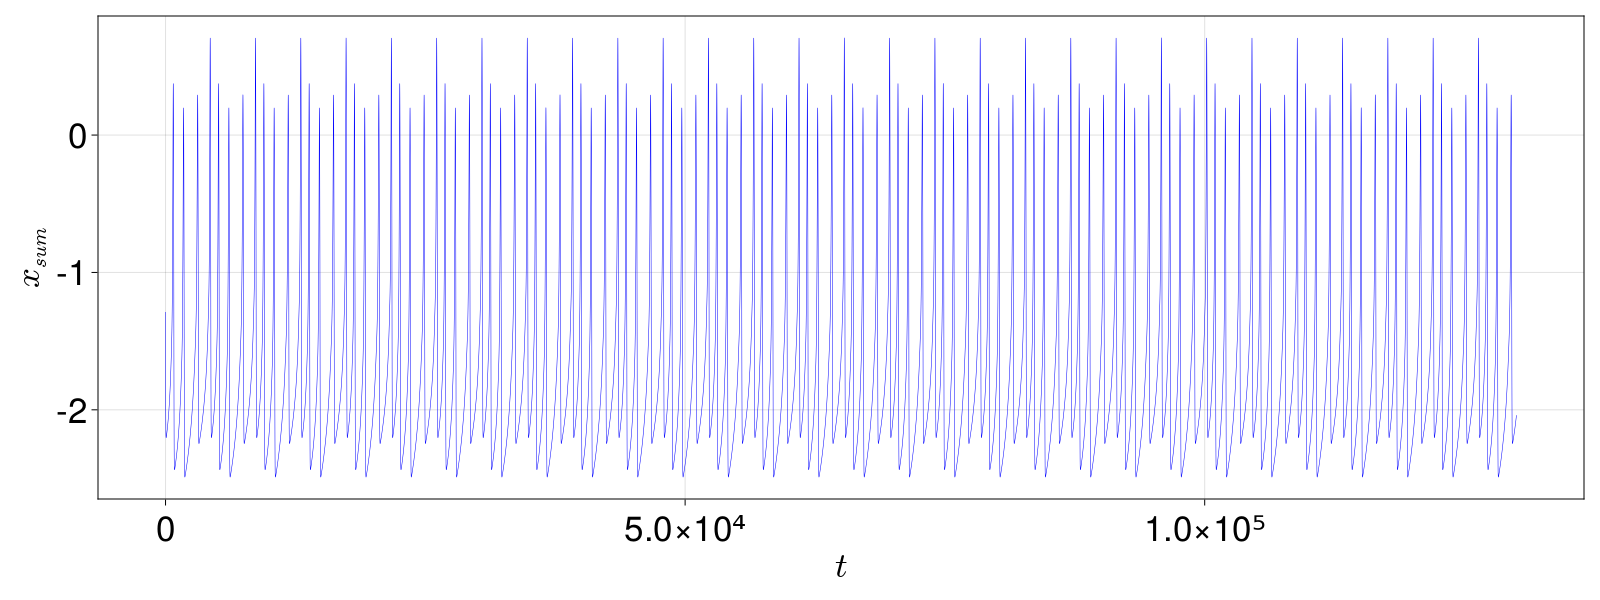

In [20]:
f = Figure(resolution = (1600, 600), fontsize = 35)

ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{sum}")
ts, tf = 20000, 150000
lines!((x1 + x2)[ts:tf], linewidth = 0.5, color = "blue" )


f

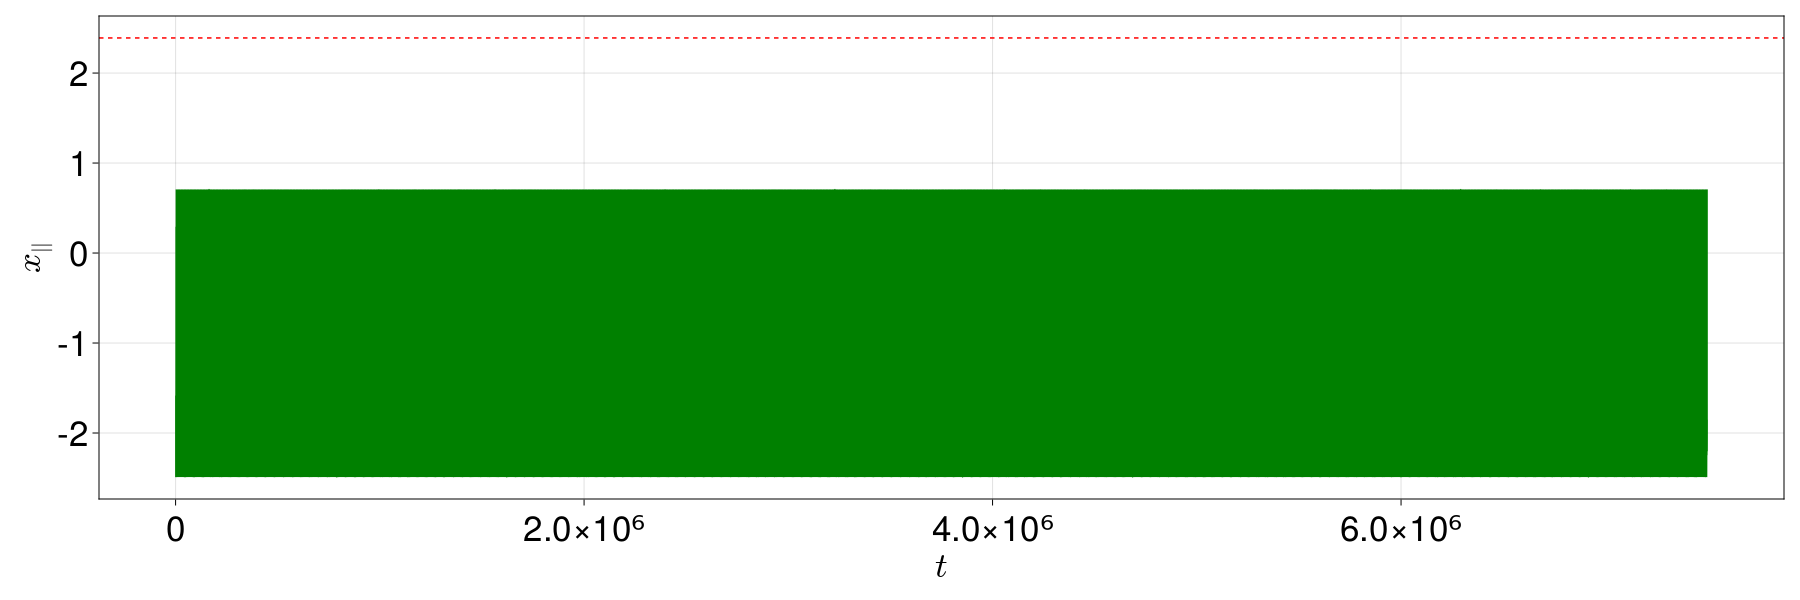

In [21]:
f = Figure(resolution = (1800, 600), fontsize = 35)

ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{||}")
ts, tf = 20000, 150000
lines!((x1 + x2), linewidth = 1.0, color = "green" )

hlines!(threshold, lewidth = 1.0, linestyle = :dash, color = "red")

f

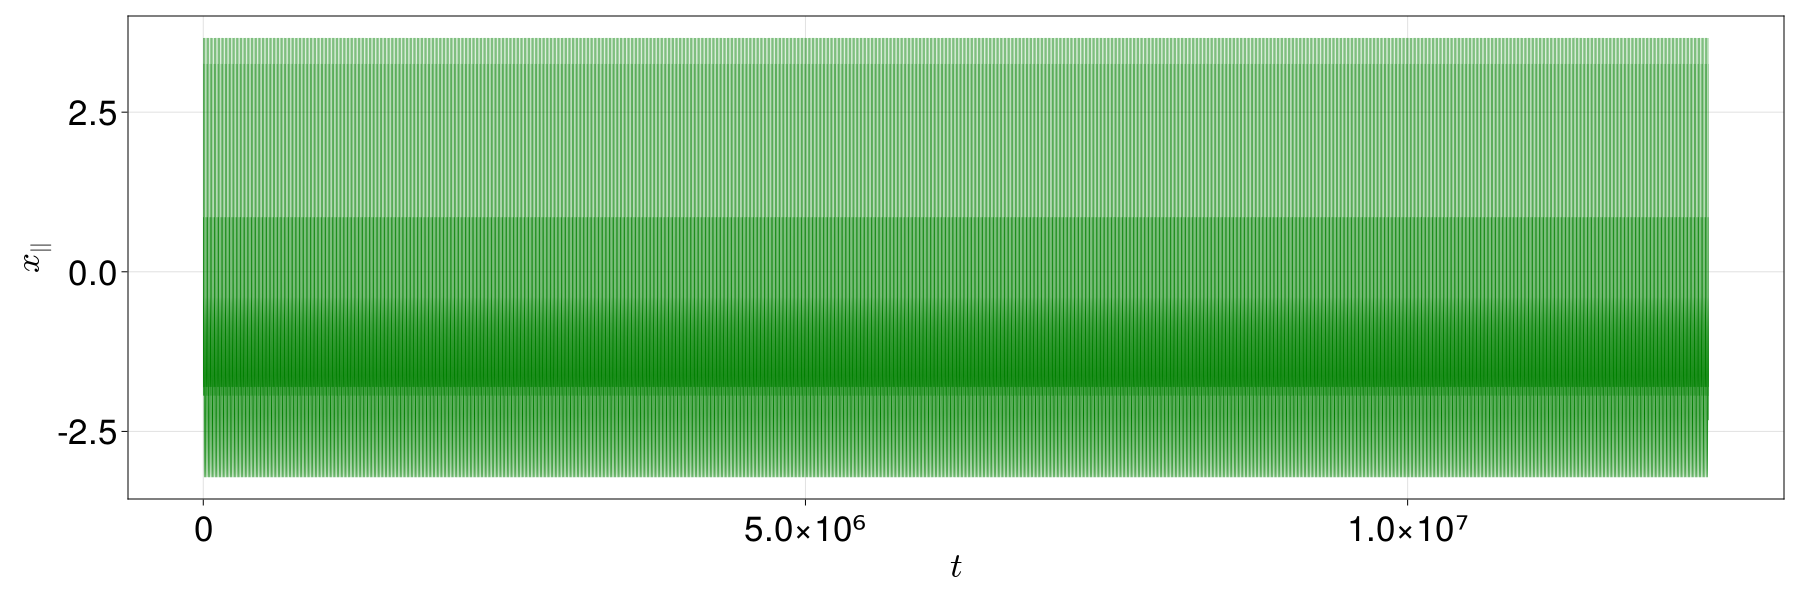

In [22]:
f = Figure(resolution = (1800, 600), fontsize = 35)

ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{||}")
ts, tf = 20000, 250000
lines!((x11 + x21), linewidth = 0.5, color = "green" )

#hlines!(threshold, lewidth = 1.0, linestyle = :dash, color = "red")

f

In [23]:
lyapunovspectrum(ds, 350000; diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

6-element Vector{Float64}:
   1.2260014891328548e-5
  -0.003672148021917031
  -0.003690932605027485
  -0.090299363422087
  -5.800251447987498
 -13.831697538153785

In [24]:
lyapunovspectrum(ds1, 350000; diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

6-element Vector{Float64}:
  0.418654982120538
  1.0321666159849956e-5
 -0.017333763720870105
 -0.032029252867915844
 -8.6535574330057
 -9.225713078628564

In [12]:
fp = fixedpoints(ds, box)

(6-dimensional Dataset{Float64} with 1 points, Vector{ComplexF64}[[-7.722025477672935 + 0.0im, -7.268572009186302 + 0.0im, 0.04087019603755752 - 0.06189321784541688im, 0.04087019603755752 + 0.06189321784541688im, 0.043637659307651414 + 0.0im, 0.11714058104574834 + 0.0im]], Bool[0])

In [13]:
fpx1 = fp[1][1][1]
fpy1 = fp[1][1][2]
fpz1 = fp[1][1][3]
fpx2 = fp[1][1][4]
fpy2 = fp[1][1][5]
fpz2 = fp[1][1][6]

4.308855908363299

In [14]:
fp[1][1]

6-element SVector{6, Float64} with indices SOneTo(6):
 -0.7382288183273403
 -1.7249089410449063
  4.308855908363299
 -0.7382288183273403
 -1.7249089410449063
  4.308855908363299

In [15]:
fp[2][1]

6-element Vector{ComplexF64}:
   -7.722025477672935 + 0.0im
   -7.268572009186302 + 0.0im
  0.04087019603755752 - 0.06189321784541688im
  0.04087019603755752 + 0.06189321784541688im
 0.043637659307651414 + 0.0im
  0.11714058104574834 + 0.0im

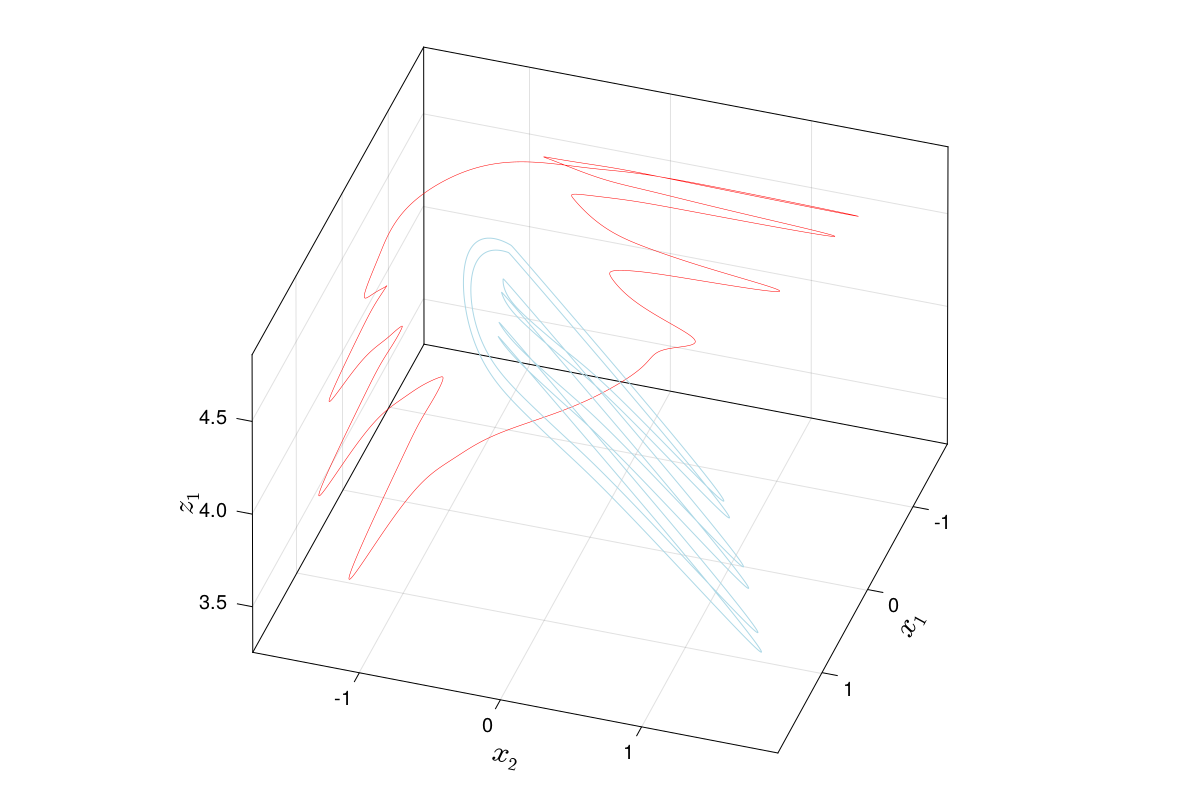

In [44]:
f = Figure(resolution = (1200, 800))

ts, tf = 1200000, 1300000

ax = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"z_1", elevation = 0.2pi, azimuth = 0.1pi,
                xlabelsize = 30, ylabelsize = 30, zlabelsize = 30,
                xticklabelsize = 20, yticklabelsize = 20, zticklabelsize = 20  )
            

lines!(ax, x1[ts: tf], x2[ts: tf], z1[ts: tf], linewidth = 0.5, color = "red" )

lines!(ax, x11[ts: tf], x21[ts: tf], z11[ts: tf], linewidth = 1.0, color = "lightblue" )
#scatter!(ax, fpx1, fpx2, fpz1, markersize = 5 )

f

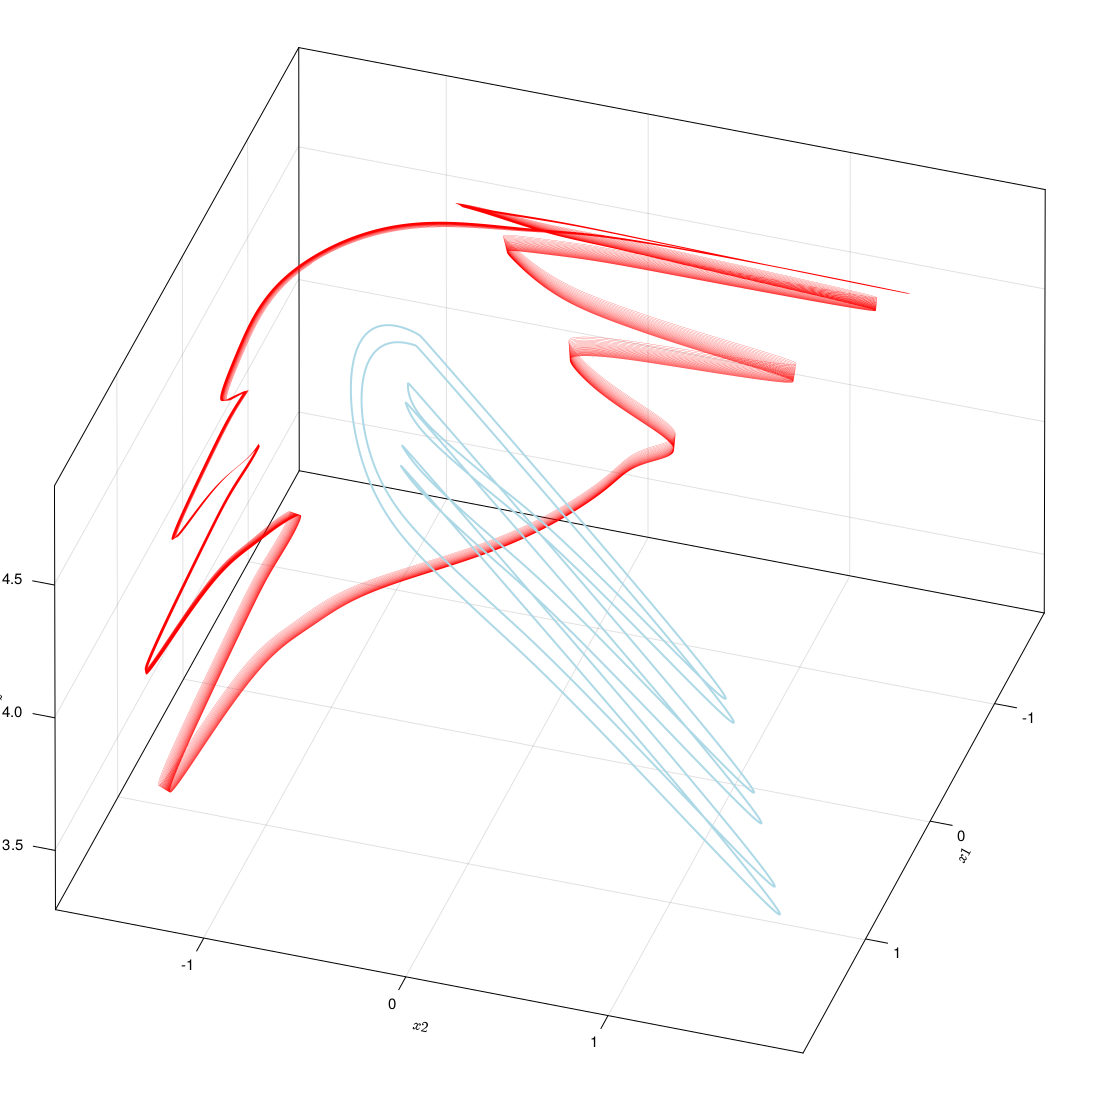

In [12]:
f = Figure(resolution = (1100, 1100), fontsize = 15)

ts, tf = 1200000, 1480000

ax = Axis3(f[1, 1], xlabel = L"x1", ylabel = L"x2", zlabel = L"z",elevation = 0.2pi, azimuth = 0.1pi)
                

lines!(ax, x1[ts: tf], x2[ts: tf], z1[ts: tf], linewidth = 0.2, color = "red" )

lines!(ax, x11[ts: tf], x21[ts: tf], z11[ts: tf], linewidth = 2.0, color = "lightblue" )
f

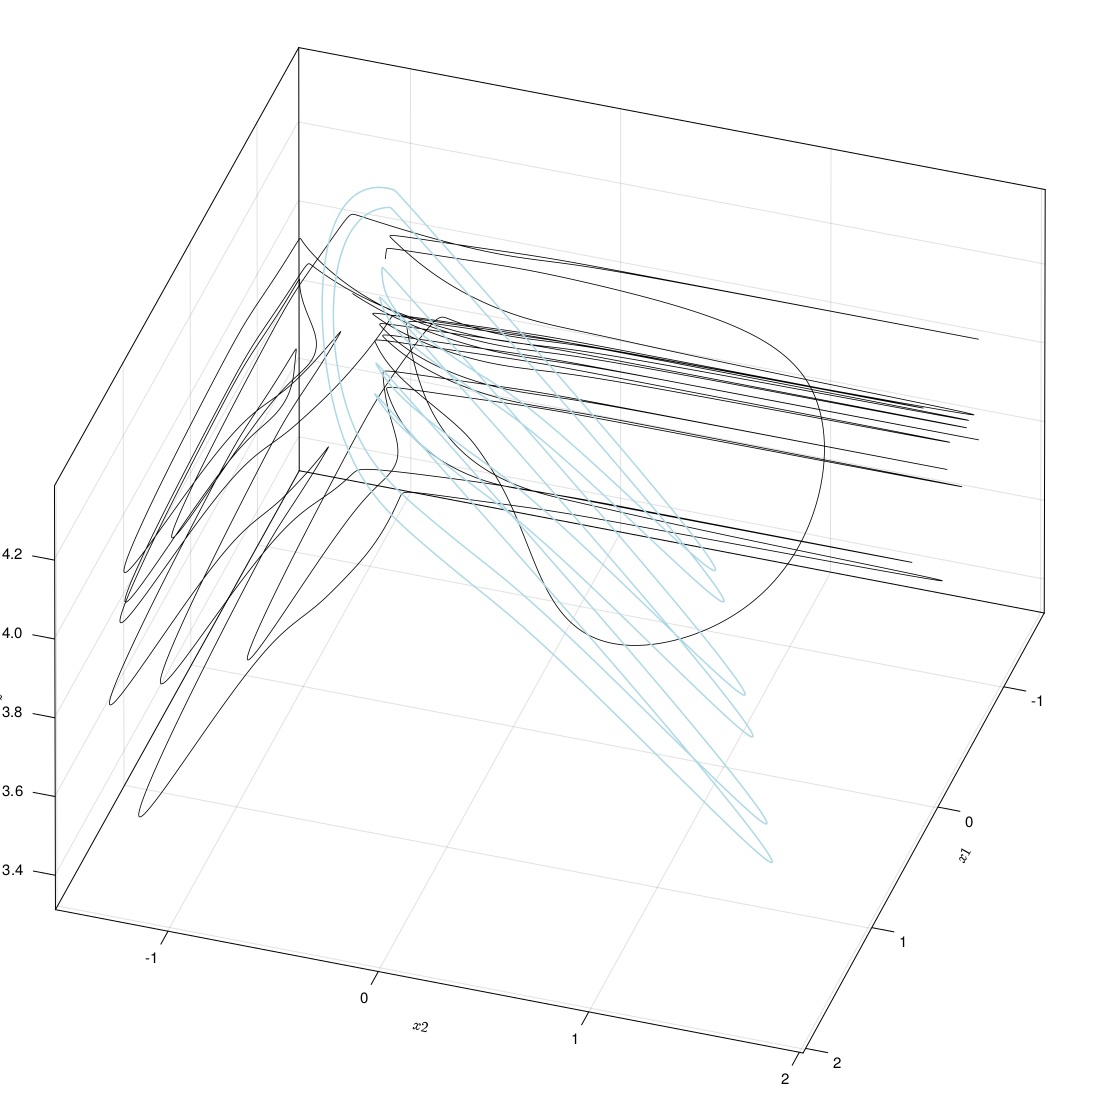

In [743]:
f = Figure(resolution = (1100, 1100), fontsize = 15)

ts, tf = 1320000, 1348000

ax = Axis3(f[1, 1], xlabel = L"x1", ylabel = L"x2", zlabel = L"z",
                elevation = 0.2pi, azimuth = 0.1pi)

lines!(ax, x1[ts: tf], x2[ts: tf], z1[ts: tf], linewidth = 0.8, color = "black" )

lines!(ax, x11[ts: tf], x21[ts: tf], z11[ts: tf], linewidth = 1.5, color = "lightblue" )
f

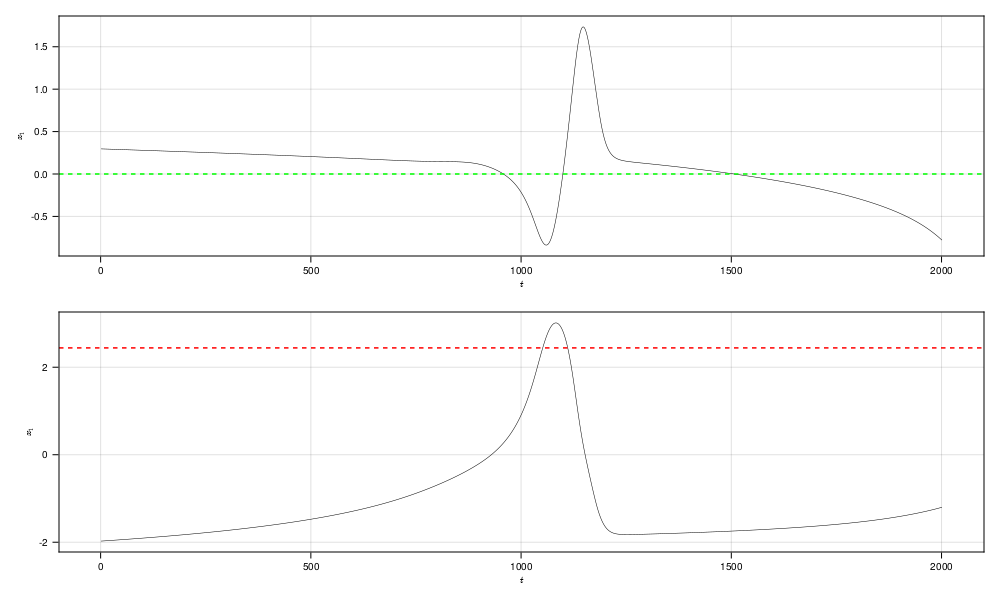

In [238]:
f = Figure(resolution = (1000, 600), fontsize = 10)

ts, tf = 3034000, 3036000

ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{1}")
lines!(ax, x1[ts: tf] - x2[ts: tf], linewidth = 0.5, color = "black" )
hlines!(ax, 0, linestyle = :dash, color = "lime")

ax2 = Axis(f[2, 1], xlabel = L"t", ylabel = L"x_{1}")
lines!(ax2, xsum[ts: tf], linewidth = 0.5, color = "black" )
hlines!(ax2, threshold, linestyle = :dash, color = "red")

f

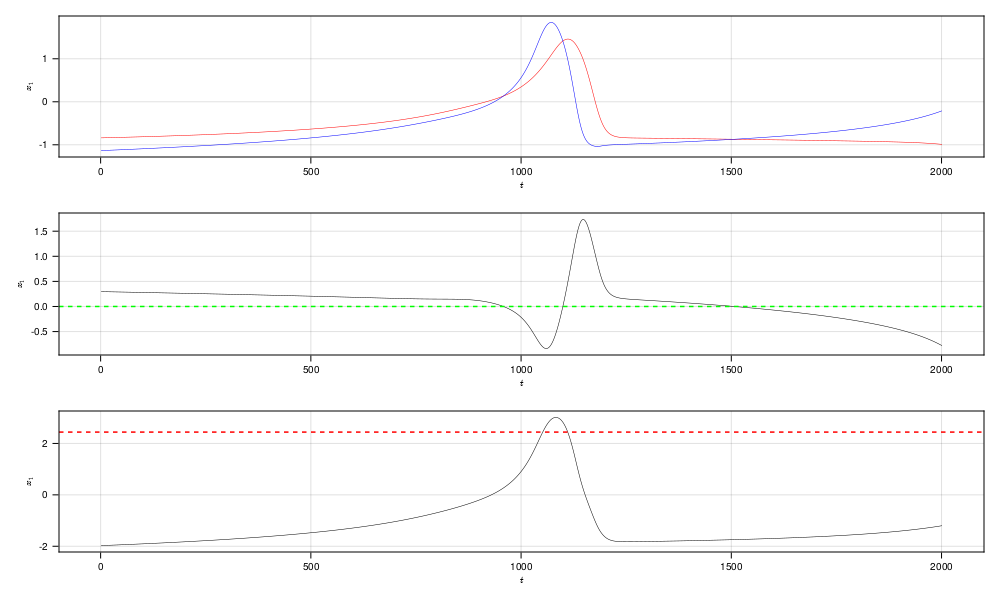

In [159]:
f = Figure(resolution = (1000, 600), fontsize = 10)

ts, tf = 3034000, 3036000

ax1 = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{1}")
lines!(ax1, x1[ts: tf], linewidth = 0.5, color = "red" )

lines!(ax1, x2[ts: tf], linewidth = 0.5, color = "blue" )

ax = Axis(f[2, 1], xlabel = L"t", ylabel = L"x_{1}")
lines!(ax, x1[ts: tf] - x2[ts: tf], linewidth = 0.5, color = "black" )
hlines!(ax, 0, linestyle = :dash, color = "lime")

ax2 = Axis(f[3, 1], xlabel = L"t", ylabel = L"x_{1}")
lines!(ax2, xsum[ts: tf], linewidth = 0.5, color = "black" )
hlines!(ax2, threshold, linestyle = :dash, color = "red")
f

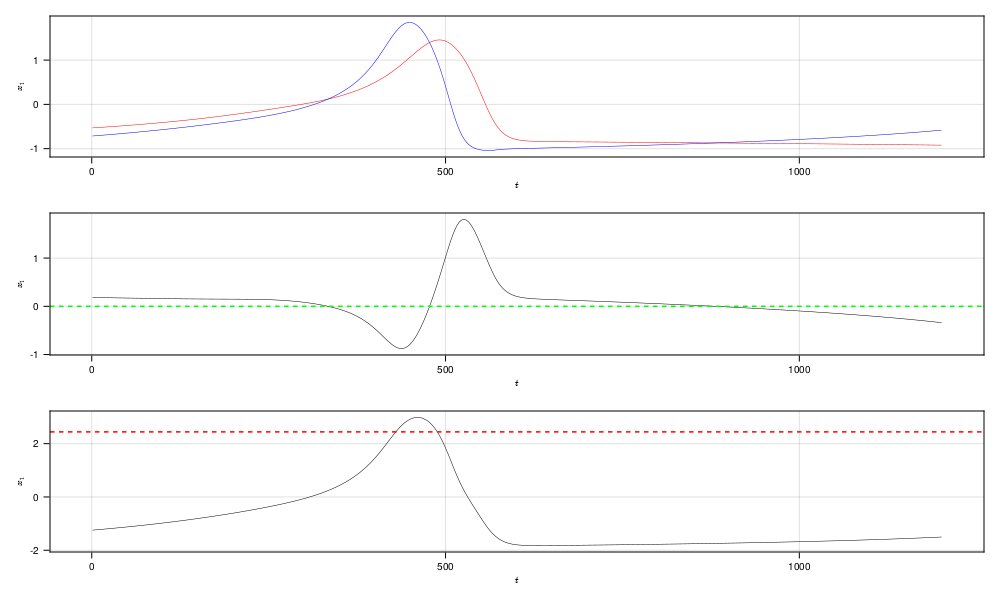

In [160]:
f = Figure(resolution = (1000, 600), fontsize = 10)

ts, tf = 1788800, 1790000

ax1 = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{1}")
lines!(ax1, x1[ts: tf], linewidth = 0.5, color = "red" )

lines!(ax1, x2[ts: tf], linewidth = 0.5, color = "blue" )

ax = Axis(f[2, 1], xlabel = L"t", ylabel = L"x_{1}")
lines!(ax, x1[ts: tf] - x2[ts: tf], linewidth = 0.5, color = "black" )
hlines!(ax, 0, linestyle = :dash, color = "lime")

ax2 = Axis(f[3, 1], xlabel = L"t", ylabel = L"x_{1}")
lines!(ax2, xsum[ts: tf], linewidth = 0.5, color = "black" )
hlines!(ax2, threshold, linestyle = :dash, color = "red")
f

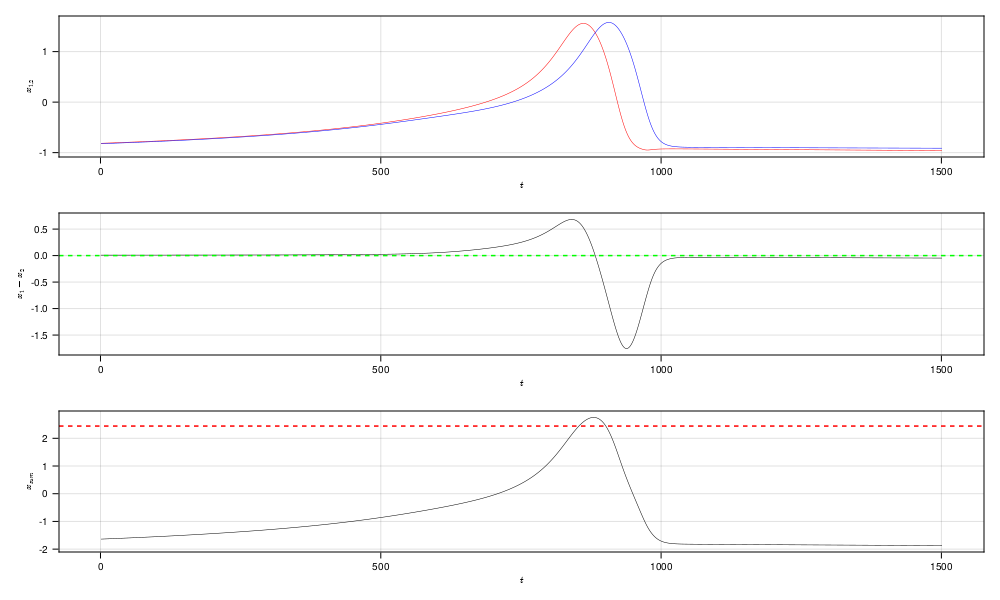

In [190]:
f = Figure(resolution = (1000, 600), fontsize = 10)

ts, tf = 1346500, 1348000

ax1 = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{1, 2}")
lines!(ax1, x1[ts: tf], linewidth = 0.5, color = "red" )

lines!(ax1, x2[ts: tf], linewidth = 0.5, color = "blue" )

ax = Axis(f[2, 1], xlabel = L"t", ylabel = L"x_{1} - x_{2}")
lines!(ax, x1[ts: tf] - x2[ts: tf], linewidth = 0.5, color = "black" )
hlines!(ax, 0, linestyle = :dash, color = "lime")

ax2 = Axis(f[3, 1], xlabel = L"t", ylabel = L"x_{sum}")
lines!(ax2, xsum[ts: tf], linewidth = 0.5, color = "black" )
hlines!(ax2, threshold, linestyle = :dash, color = "red")
f